# Part 4 - What to enrich with? (What are Data Collections and Analysis Variables?)

## Data Collections and GeoEnrichment coverage

As described earlier, a data collection is a preassembled list of attributes that will be used to enrich the input features. Collection attributes can describe various types of information, such as demographic characteristics and geographic context of the locations or areas submitted as input features. 

Some data collections (such as default) can be used in all supported countries. Other data collections may only be available in one or a collection of countries. [Data Browser](https://doc.arcgis.com/en/esri-demographics/data/data-browser.htm) can be used to examine the entire global listing of variables, and associated datasets for each country.

<div class="embed-container"><iframe frameborder="false" scrolling="no" width="800" height="600" marginheight="0" marginwidth="0" 
src="https://la.arcgis.com/databrowser/index.html"></iframe></div>

### List Countries with GeoEnrichment Data

The `get_countries()` method can be used to query the countries for which GeoEnrichment data is available, and it returns a list of `Country` objects with which you can further query for properties. This list can also be viewed [here](https://developers.arcgis.com/rest/geoenrichment/api-reference/geoenrichment-coverage.htm).

In [1]:
from arcgis.gis import GIS
from arcgis.geoenrichment import Country, enrich, get_countries

In [2]:
# Create a GIS Connection
gis = GIS(profile='your_online_admin_profile')

In [3]:
countries = get_countries()
print("Number of countries for which GeoEnrichment data is available: " + str(len(countries)))

#print a few countries for a sample
countries[0:10]

Number of countries for which GeoEnrichment data is available: 177


,iso2,iso3,name,alt_name,datasets,default_dataset,continent,hierarchies,default_hierarchy
0,AL,ALB,Albania,ALBANIA,[ALB_MBR_2024],ALB_MBR_2024,Europe,[census],census
1,DZ,DZA,Algeria,ALGERIA,[DZA_MBR_2025],DZA_MBR_2025,Africa,[census],census
2,AD,AND,Andorra,ANDORRA,[AND_MBR_2024],AND_MBR_2024,Europe,[census],census
3,AO,AGO,Angola,ANGOLA,[AGO_MBR_2025],AGO_MBR_2025,Africa,[census],census
4,AI,AIA,Anguilla,ANGUILLA,[AIA_MBR_2025],AIA_MBR_2025,North America,[census],census
5,AR,ARG,Argentina,ARGENTINA,[ARG_MBR_2024],ARG_MBR_2024,South America,[census],census
6,AM,ARM,Armenia,ARMENIA,[ARM_MBR_2024],ARM_MBR_2024,Europe,[census],census
7,AW,ABW,Aruba,ARUBA,[ABW_MBR_2025],ABW_MBR_2025,North America,[census],census
8,AU,AUS,Australia,AUSTRALIA,"[AUS_ABS_2021, AUS_MBR_2024]",AUS_ABS_2021,Oceania,"[AUS_ABS, census]",AUS_ABS
9,AT,AUT,Austria,AUSTRIA,[AUT_MBR_2024],AUT_MBR_2024,Europe,[census],census


### Data Collections for U.S.

The `data_collections` property of a `Country` object lists its available data collections and analysis variables under each data collection as a Pandas dataframe.

In order to discover the data collections for a particular country, you may first access the reference variable to it using the `country.get()` method, and then fetch the data collections from `country.data_collections` property. Once we know the data collection we would like to use, we can look at `analysisVariable`s available in that data collection.

In [3]:
# Get US as a country
usa = Country.get('US')
type(usa)

arcgis.geoenrichment.enrichment.Country

In [4]:
usa_df = usa.data_collections

# print a few rows of the DataFrame
usa_df.head()

,analysisVariable,alias,fieldCategory,vintage
dataCollectionID,,,,
1yearincrements,1yearincrements.AGE0_CY,2025 Population Age <1,2025 Age: 1 Year Increments (Esri),2025
1yearincrements,1yearincrements.AGE1_CY,2025 Population Age 1,2025 Age: 1 Year Increments (Esri),2025
1yearincrements,1yearincrements.AGE2_CY,2025 Population Age 2,2025 Age: 1 Year Increments (Esri),2025
1yearincrements,1yearincrements.AGE3_CY,2025 Population Age 3,2025 Age: 1 Year Increments (Esri),2025
1yearincrements,1yearincrements.AGE4_CY,2025 Population Age 4,2025 Age: 1 Year Increments (Esri),2025


In [5]:
usa_df.shape

(21033, 4)

#### Unique Data Collections for U.S.

Each data collection and analysis variable has a unique ID. When calling the `enrich()` method (explained earlier in this guide) these analysis variables can be passed in the `data_collections` and `analysis_variables` parameters.

As an example, here we see a subset of the data collections for US showing 2 different data collections and multiple analysis variables for each collection.

In [6]:
usa_df.iloc[500:600,:]

,analysisVariable,alias,fieldCategory,vintage
dataCollectionID,,,,
1yearincrements,1yearincrements.FAGE75_FY,2030 Females Age 75,2030 Age: 1 Year Increments (Esri),2030
1yearincrements,1yearincrements.FAGE76_FY,2030 Females Age 76,2030 Age: 1 Year Increments (Esri),2030
1yearincrements,1yearincrements.FAGE77_FY,2030 Females Age 77,2030 Age: 1 Year Increments (Esri),2030
1yearincrements,1yearincrements.FAGE78_FY,2030 Females Age 78,2030 Age: 1 Year Increments (Esri),2030
1yearincrements,1yearincrements.FAGE79_FY,2030 Females Age 79,2030 Age: 1 Year Increments (Esri),2030
...,...,...,...,...
1yearincrements,1yearincrements.AGE18C20,2020 Population Age 18,2020 Age: 1 Year Increments (U.S. Census),2020
1yearincrements,1yearincrements.AGE19C20,2020 Population Age 19,2020 Age: 1 Year Increments (U.S. Census),2020
1yearincrements,1yearincrements.AGE20C20,2020 Population Age 20,2020 Age: 1 Year Increments (U.S. Census),2020


The table above shows 2 different data collections (1yearincrements and 5yearincrements). Since these are `Age` data collections, the `analysisVariable`s for these collections are similar. `vintage` shows the year that the demographic data represents. For example, a vintage of 2020 means that the data represents the year 2020.

Let's get a list of unique data collections that are available for U.S. 

In [7]:
usa_df.index.nunique()

121

*United States has 150 unique data collections.* Here are the first 10 data collections.


In [8]:
list(usa_df.index.unique())[:10]

['1yearincrements',
 '5yearincrements',
 'Age',
 'agebyracebysex',
 'agebyracebysex2010',
 'agebyracebysex2020',
 'AgeDependency',
 'AtRisk',
 'AutomobilesAutomotiveProducts',
 'BabyProductsToysGames']

Looking at `fieldCategory` is a great way to clearly understand what the data collection is about. `fieldCategory` combines vintage, datacollectionID columns along with the year and data collection. However, to query a data collection its unique ID (`dataCollectionID`) must be used.

Let's look at the `fieldCategory` column for a few data collections in US.

In [9]:
usa_df.fieldCategory.unique()[:10]

array(['2025 Age: 1 Year Increments (Esri)',
       '2030 Age: 1 Year Increments (Esri)',
       '2010 Age: 1 Year Increments (U.S. Census)',
       '2020 Age: 1 Year Increments (U.S. Census)',
       '2025 Age: 5 Year Increments (Esri)',
       '2030 Age: 5 Year Increments (Esri)',
       '2010 Age: 5 Year Increments (U.S. Census)',
       '2019-2023 Age: 5 Year Increments (ACS)',
       '2020 Age: 5 Year Increments (U.S. Census)',
       '2025 Age by Sex by Race (Esri)'], dtype=object)

#### Data Collections by Socio-demographic Factors

You can filter the `data_collections` to get collections for a specific factor using Pandas expressions. Let's loook at data collections for different `socio-demographic factors` such as `Age, Population, Income`.

__Data Collections for Age__

In [10]:
Age_Collections = usa_df['fieldCategory'].str.contains('Age', na=False)
usa_df[Age_Collections].fieldCategory.unique()

array(['2025 Age: 1 Year Increments (Esri)',
       '2030 Age: 1 Year Increments (Esri)',
       '2010 Age: 1 Year Increments (U.S. Census)',
       '2020 Age: 1 Year Increments (U.S. Census)',
       '2025 Age: 5 Year Increments (Esri)',
       '2030 Age: 5 Year Increments (Esri)',
       '2010 Age: 5 Year Increments (U.S. Census)',
       '2019-2023 Age: 5 Year Increments (ACS)',
       '2020 Age: 5 Year Increments (U.S. Census)',
       '2025 Age by Sex by Race (Esri)', '2030 Age by Sex by Race (Esri)',
       '2010 Age by Sex by Race (U.S. Census)',
       '2020 Age by Sex by Race (U.S. Census)',
       '2025 Age Dependency (Esri)', '2030 Age Dependency (Esri)',
       '2025 Disposable Income by Age (Esri)',
       '2010 Households by Age of Householder (U.S. Census)',
       '2019-2023 Households by Type and Size and Age (ACS)',
       '2010 Housing by Age of Householder (U.S. Census)',
       '2020 Housing by Age of Householder (U.S. Census)',
       '2025 Income by Age (Esri)', 

__Data Collections for Population__

In [11]:
Pop_Collections = usa_df['fieldCategory'].str.contains('Population', na=False)
usa_df[Pop_Collections].fieldCategory.unique()

array(['2010 Population (U.S. Census)', '2020 Population (U.S. Census)',
       '2019-2023 Population by Language Spoken at Home (ACS)',
       '2025 Daytime Population (Esri)',
       '2025 Population by Generation (Esri)',
       '2030 Population by Generation (Esri)',
       '2020 Group Quarters Population (U.S. Census)',
       '2010 Group Quarters Population (U.S. Census)',
       '2020 Hispanic Population of Two or More Races (U.S. Census)',
       '2020 Hispanic Population <18 Years by Race (U.S. Census)',
       '2020 Hispanic Population 18+ Years by Race (U.S. Census)',
       '2020 Hispanic Population 18+ Years of Two or More Races (U.S. Census)',
       '2025 Population Time Series (Esri)',
       '2010 Population by Relationship and Household Type (U.S. Census)',
       '2019-2023 Population by Relationship and Household Type (ACS)',
       '2020 Population by Relationship and Household Type (U.S. Census)',
       '2025 Tapestry (Population)',
       '2020 Non Hispanic Popu

__Data Collections for Income__

In [12]:
Income_Collections = usa_df['fieldCategory'].str.contains('Income', na=False)
Income_Collections.index.unique()

Index(['1yearincrements', '5yearincrements', 'Age', 'agebyracebysex',
       'agebyracebysex2010', 'agebyracebysex2020', 'AgeDependency', 'AtRisk',
       'AutomobilesAutomotiveProducts', 'BabyProductsToysGames',
       ...
       'unitsinstructure', 'urbanicity', 'UrbanicityLandarea', 'vacant',
       'vehiclesavailable', 'veterans', 'Wealth', 'women', 'yearbuilt',
       'yearmovedin'],
      dtype='object', name='dataCollectionID', length=121)

As mentioned earlier, using a `data_collection`'s unique ID (`dataCollectionID`) is the best way to further query a data collection. Let's look at the `dataCollectionID` for various Income data collections.

In [13]:
usa_df[Income_Collections].index.unique()

Index(['AtRisk', 'basicFactsForMobileApps', 'disposableincome',
       'foodstampsSNAP', 'Health', 'householdincome', 'households',
       'incomebyage', 'KeyUSFacts', 'Policy', 'population', 'Wealth'],
      dtype='object', name='dataCollectionID')

#### Analysis variables for Data Collections
Once we know the data collection we would like to use, we can look at all the unique variables available in that data collection using its unique ID. Let's discover `analysisVariable`s for some of the data collections.

__Analysis variables for `Age` data collection__

In [14]:
usa_df.loc['Age']['analysisVariable'].unique()

array(['Age.MALE0', 'Age.MALE5', 'Age.MALE10', 'Age.MALE15', 'Age.MALE20',
       'Age.MALE25', 'Age.MALE30', 'Age.MALE35', 'Age.MALE40',
       'Age.MALE45', 'Age.MALE50', 'Age.MALE55', 'Age.MALE60',
       'Age.MALE65', 'Age.MALE70', 'Age.MALE75', 'Age.MALE80',
       'Age.MALE85', 'Age.FEM0', 'Age.FEM5', 'Age.FEM10', 'Age.FEM15',
       'Age.FEM20', 'Age.FEM25', 'Age.FEM30', 'Age.FEM35', 'Age.FEM40',
       'Age.FEM45', 'Age.FEM50', 'Age.FEM55', 'Age.FEM60', 'Age.FEM65',
       'Age.FEM70', 'Age.FEM75', 'Age.FEM80', 'Age.FEM85'], dtype=object)

Analysis variables are typically represented as `dataCollectionID.<analysis variable name>` as seen above.

__Analysis variables for `DaytimePopulation` data collection__

In [15]:
usa_df.loc['DaytimePopulation']['analysisVariable'].unique()

array(['DaytimePopulation.DPOP_CY', 'DaytimePopulation.DPOPWRK_CY',
       'DaytimePopulation.DPOPRES_CY', 'DaytimePopulation.DPOPDENSCY'],
      dtype=object)

### Data Collections for Another Country

Let's look at data collections for New Zealand. [Data Browser](https://doc.arcgis.com/en/esri-demographics/data/data-browser.htm) can be used to examine the entire global listing of variables, and associated datasets for New Zealand.

In order to discover the data collections for a particular country, you may first access the reference variable to it using the `country.get()` method, and then fetch the data collections from `country.data_collections` property. Once we know the data collection we would like to use, we can look at `analysisVariable`s available in that data collection.

In [16]:
# Get US as a country
nz = Country.get('New Zealand')
type(nz)

arcgis.geoenrichment.enrichment.Country

In [17]:
nz_df = nz.data_collections

# print a few rows of the DataFrame
nz_df.head()

,analysisVariable,alias,fieldCategory,vintage
dataCollectionID,,,,
5YearIncrementsStatsNZ,5YearIncrementsStatsNZ.Age5year_Total,2023 5-Year Age Groups: Total,2023 Population by Age (Stats NZ),2023
5YearIncrementsStatsNZ,5YearIncrementsStatsNZ.Age5year_0_4_years,2023 5-Year Age Group: 0 to 4 Years,2023 Population by Age (Stats NZ),2023
5YearIncrementsStatsNZ,5YearIncrementsStatsNZ.Age5year_5_9_years,2023 5-Year Age Group: 5 to 9 Years,2023 Population by Age (Stats NZ),2023
5YearIncrementsStatsNZ,5YearIncrementsStatsNZ.Age5year_10_14_years,2023 5-Year Age Group: 10 to 14 Years,2023 Population by Age (Stats NZ),2023
5YearIncrementsStatsNZ,5YearIncrementsStatsNZ.Age5year_15_19_years,2023 5-Year Age Group: 15 to 19 Years,2023 Population by Age (Stats NZ),2023


In [18]:
nz_df.shape

(718, 4)

#### Unique Data Collections for New Zealand

Let's get a list of unique data collections that are available for New Zealand.

In [19]:
nz_df.index.unique()

Index(['5YearIncrementsStatsNZ', 'AccesstoAmenitiesStatsNZ',
       'AccesstoTelecommunicationsStatsNZ', 'BirthplaceStatsNZ',
       'DwellingDampnessStatsNZ', 'EducationalAttainmentStatsNZ',
       'EmploymentStatusStatsNZ', 'EthnicityStatsNZ', 'FamilyStatsNZ',
       'HealthStatsNZ', 'HeatingSourceStatsNZ', 'HomeOwnershipStatusStatsNZ',
       'HoursWorkedStatsNZ', 'HouseholdIncomeStatsNZ', 'HousingbySizeStatsNZ',
       'HousingCostsStatsNZ', 'ImmigrationPeriodStatsNZ', 'IndustryStatsNZ',
       'JobSearchStatsNZ', 'KeyGlobalFacts', 'LabourForceStatusStatsNZ',
       'LandlordTypeStatsNZ', 'LanguageSpokenStatsNZ',
       'LifeCycleGroupsStatsNZ', 'MaoriDescentStatsNZ', 'MaritalStatusStatsNZ',
       'MethodofTraveltoWorkStatsNZ', 'NumberofBornChildrenStatsNZ',
       'OccupancyStatusStatsNZ', 'OccupationStatsNZ', 'PersonalIncomeStatsNZ',
       'PopulationTotalsStatsNZ', 'ReligiousAffiliationStatsNZ',
       'SmokingBehaviourStatsNZ', 'StructureTypeStatsNZ',
       'StudyParticipati

New Zealand has 40 unique data collections.

We can look at the `fieldCategory` column to understand each category better.

In [20]:
nz_df.fieldCategory.unique()

array(['2023 Population by Age (Stats NZ)',
       '2023 AccessToAmenities (Stats NZ)',
       '2023 Access To Telecommunications (Stats NZ)',
       '2023 Birthplace (Stats NZ)', '2023 Dwelling Dampness (Stats NZ)',
       '2023 Dwelling Mould (Stats NZ)',
       '2023 Educational Attainment (Stats NZ)',
       '2023 Post-school Qualification Indicator (Stats NZ)',
       '2023 Highest Secondary School Qualification (Stats NZ)',
       '2023 Post-school Qualification (Stats NZ)',
       '2023 Empolyment Status (Stats NZ)', '2023 Ethnicity (Stats NZ)',
       '2023 Family Totals (Stats NZ)',
       '2023 Dwelling by Family Type (Stats NZ)',
       '2023 Number of People in Family (Stats NZ)',
       '2023 Family Income (Stats NZ)',
       '2023 Extended Family Totals (Stats NZ)',
       '2023 Dwelling by Extended Family Type (Stats NZ)',
       '2023 Extended Family Income (Stats NZ)',
       '2023 Difficulty Seeing (Stats NZ)',
       '2023 Difficulty Hearing (Stats NZ)',
       '2023

Looking at `fieldCategory` is a great way to clearly understand what the data collection is about. However, to query a data collection its unique ID (`dataCollectionID`) must be used.

#### Data Collections for Socio-demographic Factors

New Zealand has fewer `data_collections` compared to U.S. Let's look at data collections for Key Facts, Education and Family.

__Data Collection for Key Facts__

In [21]:
nz_df.loc['KeyGlobalFacts']

,analysisVariable,alias,fieldCategory,vintage
dataCollectionID,,,,
KeyGlobalFacts,KeyGlobalFacts.TOTPOP,Total Population,Key Demographic Indicators,NaN
KeyGlobalFacts,KeyGlobalFacts.TOTHH,Total Households,Key Demographic Indicators,NaN
KeyGlobalFacts,KeyGlobalFacts.TOTFEMALES,Female Population,Key Demographic Indicators,NaN
KeyGlobalFacts,KeyGlobalFacts.TOTMALES,Male Population,Key Demographic Indicators,NaN
KeyGlobalFacts,KeyGlobalFacts.AVGHHSZ,Average Household Size,Key Demographic Indicators,NaN


__Data Collection for Education__

In [22]:
nz_df.loc['EducationalAttainmentStatsNZ']

,analysisVariable,alias,fieldCategory,vintage
dataCollectionID,,,,
EducationalAttainmentStatsNZ,EducationalAttainmentStatsNZ.HighestQual_Total,2023 Education Attainment: Total,2023 Educational Attainment (Stats NZ),2023
EducationalAttainmentStatsNZ,EducationalAttainmentStatsNZ.HighestQual_TStated,2023 Education Attainment: Total Stated,2023 Educational Attainment (Stats NZ),2023
EducationalAttainmentStatsNZ,EducationalAttainmentStatsNZ.HighestQual_No_quali,2023 Education Attainment: No Qualifications,2023 Educational Attainment (Stats NZ),2023
EducationalAttainmentStatsNZ,EducationalAttainmentStatsNZ.HighestQual_L1_Certi,2023 Education Attainment: Level 1 Certificate,2023 Educational Attainment (Stats NZ),2023
EducationalAttainmentStatsNZ,EducationalAttainmentStatsNZ.HighestQual_L2_Certi,2023 Education Attainment: Level 2 Certificate,2023 Educational Attainment (Stats NZ),2023
EducationalAttainmentStatsNZ,EducationalAttainmentStatsNZ.HighestQual_L3_Certi,2023 Education Attainment: Level 3 Certificate,2023 Educational Attainment (Stats NZ),2023
EducationalAttainmentStatsNZ,EducationalAttainmentStatsNZ.HighestQual_L4_Certi,2023 Education Attainment: Level 4 Certificate,2023 Educational Attainment (Stats NZ),2023
EducationalAttainmentStatsNZ,EducationalAttainmentStatsNZ.HighestQual_L5_Diplo,2023 Education Attainment: Level 5 Diploma,2023 Educational Attainment (Stats NZ),2023
EducationalAttainmentStatsNZ,EducationalAttainmentStatsNZ.HighestQual_L6_Diplo,2023 Education Attainment: Level 6 Diploma,2023 Educational Attainment (Stats NZ),2023


__Data Collection for Family__

In [23]:
nz_df.loc['FamilyStatsNZ']

,analysisVariable,alias,fieldCategory,vintage
dataCollectionID,,,,
FamilyStatsNZ,FamilyStatsNZ.FamilyCount_Total,2023 Count of Families: Total,2023 Family Totals (Stats NZ),2023
FamilyStatsNZ,FamilyStatsNZ.FamType_Total,2023 Family Type: Total,2023 Dwelling by Family Type (Stats NZ),2023
FamilyStatsNZ,FamilyStatsNZ.FamType_CoupNoChildren,2023 Family Type: Couple Without Children,2023 Dwelling by Family Type (Stats NZ),2023
FamilyStatsNZ,FamilyStatsNZ.FamType_CoupWithChildren,2023 Family Type: Couple With Child(ren),2023 Dwelling by Family Type (Stats NZ),2023
FamilyStatsNZ,FamilyStatsNZ.FamType_OneParent,2023 Family Type: One Parent With Child(ren),2023 Dwelling by Family Type (Stats NZ),2023
FamilyStatsNZ,FamilyStatsNZ.NumberFam_Total,2023 Number of People in Family: Total,2023 Number of People in Family (Stats NZ),2023
FamilyStatsNZ,FamilyStatsNZ.NumberFam_Two,2023 Number of People in Family: Two People,2023 Number of People in Family (Stats NZ),2023
FamilyStatsNZ,FamilyStatsNZ.NumberFam_Three,2023 Number of People in Family: Three People,2023 Number of People in Family (Stats NZ),2023
FamilyStatsNZ,FamilyStatsNZ.NumberFam_Four,2023 Number of People in Family: Four People,2023 Number of People in Family (Stats NZ),2023


#### Analysis variables for Data Collections
Once we know the data collection we would like to use, we can look at all the unique variables available in that data collection using its unique ID. Let's discover `analysisVariable`s for some of the data collections we looked at earlier.

__Analysis variables for `KeyGlobalFacts` data collection__

In [24]:
nz_df.loc['KeyGlobalFacts']['analysisVariable'].unique()

array(['KeyGlobalFacts.TOTPOP', 'KeyGlobalFacts.TOTHH',
       'KeyGlobalFacts.TOTFEMALES', 'KeyGlobalFacts.TOTMALES',
       'KeyGlobalFacts.AVGHHSZ'], dtype=object)

__Analysis variables for `EducationalAttainmentStatsNZ` data collection__

In [25]:
nz_df.loc['EducationalAttainmentStatsNZ']['analysisVariable'].unique()

array(['EducationalAttainmentStatsNZ.HighestQual_Total',
       'EducationalAttainmentStatsNZ.HighestQual_TStated',
       'EducationalAttainmentStatsNZ.HighestQual_No_quali',
       'EducationalAttainmentStatsNZ.HighestQual_L1_Certi',
       'EducationalAttainmentStatsNZ.HighestQual_L2_Certi',
       'EducationalAttainmentStatsNZ.HighestQual_L3_Certi',
       'EducationalAttainmentStatsNZ.HighestQual_L4_Certi',
       'EducationalAttainmentStatsNZ.HighestQual_L5_Diplo',
       'EducationalAttainmentStatsNZ.HighestQual_L6_Diplo',
       'EducationalAttainmentStatsNZ.HighestQual_Bachelor',
       'EducationalAttainmentStatsNZ.HighestQual_PostGrad',
       'EducationalAttainmentStatsNZ.HighestQual_Masters',
       'EducationalAttainmentStatsNZ.HighestQual_Doctorat',
       'EducationalAttainmentStatsNZ.HighestQual_OSSecSch',
       'EducationalAttainmentStatsNZ.HighestQual_NEI',
       'EducationalAttainmentStatsNZ.PostIndicator_No',
       'EducationalAttainmentStatsNZ.PostIndicator_NZ'

__Analysis variables for `FamilyStatsNZ` data collection__

In [26]:
nz_df.loc['FamilyStatsNZ']['analysisVariable'].unique()

array(['FamilyStatsNZ.FamilyCount_Total', 'FamilyStatsNZ.FamType_Total',
       'FamilyStatsNZ.FamType_CoupNoChildren',
       'FamilyStatsNZ.FamType_CoupWithChildren',
       'FamilyStatsNZ.FamType_OneParent', 'FamilyStatsNZ.NumberFam_Total',
       'FamilyStatsNZ.NumberFam_Two', 'FamilyStatsNZ.NumberFam_Three',
       'FamilyStatsNZ.NumberFam_Four', 'FamilyStatsNZ.NumberFam_Five',
       'FamilyStatsNZ.NumberFam_Six', 'FamilyStatsNZ.NumberFam_SevenMore',
       'FamilyStatsNZ.NumberFam_Average', 'FamilyStatsNZ.FamIncome_Total',
       'FamilyStatsNZ.FamIncome_20kOrLess',
       'FamilyStatsNZ.FamIncome_20kto30k',
       'FamilyStatsNZ.FamIncome_30kto50k',
       'FamilyStatsNZ.FamIncome_50kto70k',
       'FamilyStatsNZ.FamIncome_70kto100k',
       'FamilyStatsNZ.FamIncome_100kto150k',
       'FamilyStatsNZ.FamIncome_150kto200k',
       'FamilyStatsNZ.FamIncome_200korMore',
       'FamilyStatsNZ.FamIncome_Median',
       'FamilyStatsNZ.FamIncome_Tstated',
       'FamilyStatsNZ.FamInco

### Perform Enrichment using Data Collections and Analysis Variables

Data Collections can be used to enrich various study areas. `data_collection`s and `analysis_variable`s  can be passed in the `enrich()` method. Details about enriching study areas can be found in __Enriching Study Areas__ section. 

Let's look at a few similar examples of GeoEnrichment here.

#### Enrich using Data Collections

__Enrich with `Age` data collection__

Here we see an address being enriched by data from `Age` data collection.

In [27]:
# Enriching single address as single line imput
age_coll = enrich(study_areas=["380 New York St Redlands CA 92373"], 
                       data_collections=['Age'])

In [28]:
age_coll

,source_country,x,y,area_type,buffer_units,buffer_units_alias,buffer_radii,aggregation_method,population_to_polygon_size_rating,apportionment_confidence,...,fem45,fem50,fem55,fem60,fem65,fem70,fem75,fem80,fem85,SHAPE
0,US,-117.194835,34.057242,RingBuffer,esriMiles,Miles,1.0,BlockApportionment:US.BlockGroups;PointsLayer:...,2.191,2.576,...,381.0,375.0,323.0,341.0,281.0,255.0,190.0,132.0,116.0,"{""rings"": [[[-117.194835113918, 34.07175043587..."


In [29]:
age_coll.columns

Index(['source_country', 'x', 'y', 'area_type', 'buffer_units',
       'buffer_units_alias', 'buffer_radii', 'aggregation_method',
       'population_to_polygon_size_rating', 'apportionment_confidence',
       'has_data', 'male0', 'male5', 'male10', 'male15', 'male20', 'male25',
       'male30', 'male35', 'male40', 'male45', 'male50', 'male55', 'male60',
       'male65', 'male70', 'male75', 'male80', 'male85', 'fem0', 'fem5',
       'fem10', 'fem15', 'fem20', 'fem25', 'fem30', 'fem35', 'fem40', 'fem45',
       'fem50', 'fem55', 'fem60', 'fem65', 'fem70', 'fem75', 'fem80', 'fem85',
       'SHAPE'],
      dtype='object')

When a data collection is specified without specific analysis variables, all variables under the data collection are used for enrichment as can be seen above.

__Enrich with `Health` data collection__

Here we see a zip code being enriched by data from Health data collection.

In [30]:
redlands = usa.subgeographies.states['California'].zip5['92373']

In [31]:
redlands_df = enrich(study_areas=[redlands], data_collections=['Health'] )

In [32]:
redlands_df

,std_geography_level,std_geography_name,std_geography_id,source_country,aggregation_method,population_to_polygon_size_rating,apportionment_confidence,has_data,rel65_hi2_oc,acscivnins,...,pop85_cy,pop18up_cy,pop21up_cy,medage_cy,hhu18_c10,medhinc_cy,s27_bus,s27_sales,s27_emp,SHAPE
0,US.ZIP5,Redlands,92373,US,Query:US.ZIP5,2.191,2.576,1,1.0,32904.0,...,1409.0,28175.0,27097.0,41.8,3805.0,105863.0,245.0,418153000.0,5296.0,"{""rings"": [[[-117.12524300001411, 34.027986999..."


In [33]:
redlands_df.columns

Index(['std_geography_level', 'std_geography_name', 'std_geography_id',
       'source_country', 'aggregation_method',
       'population_to_polygon_size_rating', 'apportionment_confidence',
       'has_data', 'rel65_hi2_oc', 'acscivnins',
       ...
       'pop85_cy', 'pop18up_cy', 'pop21up_cy', 'medage_cy', 'hhu18_c10',
       'medhinc_cy', 's27_bus', 's27_sales', 's27_emp', 'SHAPE'],
      dtype='object', length=431)

#### Enrich using Analysis Variables

Data can be enriched by specifying specific analysis variables of a data collection with which we want to enrich our data. In this example, we will look at `analysis_variables` for Age `data_collection` and then use specific analysis variables to `enrich()` a study area.

In [34]:
# Unique analysis variables for Age data collection
usa = Country.get('US')
usa.data_collections.loc['Age']['analysisVariable'].unique()

array(['Age.MALE0', 'Age.MALE5', 'Age.MALE10', 'Age.MALE15', 'Age.MALE20',
       'Age.MALE25', 'Age.MALE30', 'Age.MALE35', 'Age.MALE40',
       'Age.MALE45', 'Age.MALE50', 'Age.MALE55', 'Age.MALE60',
       'Age.MALE65', 'Age.MALE70', 'Age.MALE75', 'Age.MALE80',
       'Age.MALE85', 'Age.FEM0', 'Age.FEM5', 'Age.FEM10', 'Age.FEM15',
       'Age.FEM20', 'Age.FEM25', 'Age.FEM30', 'Age.FEM35', 'Age.FEM40',
       'Age.FEM45', 'Age.FEM50', 'Age.FEM55', 'Age.FEM60', 'Age.FEM65',
       'Age.FEM70', 'Age.FEM75', 'Age.FEM80', 'Age.FEM85'], dtype=object)

Now, we will enrich our study area with `Age.FEM45, Age.FEM55, Age.FEM65` variables

In [35]:
enrich(study_areas=["380 New York St Redlands CA 92373"], 
       analysis_variables=["Age.FEM45","Age.FEM55","Age.FEM65"])

,source_country,x,y,area_type,buffer_units,buffer_units_alias,buffer_radii,aggregation_method,population_to_polygon_size_rating,apportionment_confidence,has_data,fem45,fem55,fem65,SHAPE
0,US,-117.194835,34.057242,RingBuffer,esriMiles,Miles,1.0,BlockApportionment:US.BlockGroups;PointsLayer:...,2.191,2.576,1,381.0,323.0,281.0,"{""rings"": [[[-117.194835113918, 34.07175043587..."


## Enriching Spatially Enabled Dataframes

One of the most common use case for GeoEnrichment is enriching existing data in feature layers. As a user, you may need to analyze and enrich your data that already exists in feature layers. Spatially Enabled DataFrame (SeDF) helps us bring the data from layer into a dataframe which can then be GeoEnriched. 

Let's look at an example using an existing layer of Covid-19 dataset. This feature layer includes latest Covid-19 Cases, Recovered and Deaths data for U.S. at the county level.

In [36]:
# Get the layer
gis = GIS(set_active=False)
covid_item = gis.content.get('628578697fb24d8ea4c32fa0c5ae1843')
print(covid_item)
covid_layer = covid_item.layers[0]
covid_layer

<Item title:"COVID-19 Cases US" type:Feature Layer Collection owner:CSSE_covid19>


<FeatureLayer url:"https://services1.arcgis.com/0MSEUqKaxRlEPj5g/arcgis/rest/services/ncov_cases_US/FeatureServer/0">

We can query the layer as a dataframe and then use the dataframe for enrichment.

In [37]:
covid_df = covid_layer.query(as_df=True)
covid_df.shape

(3272, 19)

In [38]:
covid_df.head()

,OBJECTID,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Recovered,Deaths,Active,Admin2,FIPS,Combined_Key,Incident_Rate,People_Tested,People_Hospitalized,UID,ISO3,SHAPE
0,1,Alabama,US,2023-03-10 13:21:02,32.539527,-86.644082,19790,<NA>,232,<NA>,Autauga,01001,"Autauga, Alabama, US",35422.14824,<NA>,<NA>,84001001,USA,"{""x"": -86.64408226999996, ""y"": 32.539527450000..."
1,2,Alabama,US,2023-03-10 13:21:02,30.72775,-87.722071,69860,<NA>,727,<NA>,Baldwin,01003,"Baldwin, Alabama, US",31294.516068,<NA>,<NA>,84001003,USA,"{""x"": -87.72207057999998, ""y"": 30.727749910000..."
2,3,Alabama,US,2023-03-10 13:21:02,31.868263,-85.387129,7485,<NA>,103,<NA>,Barbour,01005,"Barbour, Alabama, US",30320.82962,<NA>,<NA>,84001005,USA,"{""x"": -85.38712859999998, ""y"": 31.868263000000..."
3,4,Alabama,US,2023-03-10 13:21:02,32.996421,-87.125115,8091,<NA>,109,<NA>,Bibb,01007,"Bibb, Alabama, US",36130.21345,<NA>,<NA>,84001007,USA,"{""x"": -87.12511459999996, ""y"": 32.996420640000..."
4,5,Alabama,US,2023-03-10 13:21:02,33.982109,-86.567906,18704,<NA>,261,<NA>,Blount,01009,"Blount, Alabama, US",32345.311797,<NA>,<NA>,84001009,USA,"{""x"": -86.56790592999994, ""y"": 33.982109180000..."


To showcase GeoEnrichment, we will create a subset of the original data and then `enrich()` the subset.

In [39]:
# Create subset
test_df = covid_df.iloc[:100].copy()
test_df.shape

(100, 19)

In [40]:
# Check geometry
test_df.spatial.geometry_type

['point', None]

A dataframe can be passed as a value to `study_areas` parameter of the `enrich()` method. Here we are enriching our dataframe with specific variables from `Age` data collection.

In [42]:
# Enrich dataframe
new_df = enrich(study_areas=test_df.spatial, 
       analysis_variables=["Age.FEM45","Age.FEM55","Age.FEM65"])

In [43]:
new_df.head()

,source_country,area_type,buffer_units,buffer_units_alias,buffer_radii,aggregation_method,population_to_polygon_size_rating,apportionment_confidence,has_data,fem45,fem55,fem65,SHAPE
0,US,RingBuffer,esriMiles,Miles,1.0,BlockApportionment:US.BlockGroups;PointsLayer:...,2.191,2.576,1,5.0,5.0,5.0,"{""rings"": [[[-86.64408226999996, 32.5540396153..."
1,US,RingBuffer,esriMiles,Miles,1.0,BlockApportionment:US.BlockGroups;PointsLayer:...,2.191,2.576,1,0.0,0.0,0.0,"{""rings"": [[[-87.72207057999998, 30.7422661988..."
2,US,RingBuffer,esriMiles,Miles,1.0,BlockApportionment:US.BlockGroups;PointsLayer:...,2.191,2.576,1,2.0,2.0,3.0,"{""rings"": [[[-85.38712859999997, 31.8827767082..."
3,US,RingBuffer,esriMiles,Miles,1.0,BlockApportionment:US.BlockGroups;PointsLayer:...,2.191,2.576,0,0.0,0.0,0.0,"{""rings"": [[[-87.12511459999996, 33.0109317454..."
4,US,RingBuffer,esriMiles,Miles,1.0,BlockApportionment:US.BlockGroups;PointsLayer:...,2.191,2.576,1,7.0,8.0,5.0,"{""rings"": [[[-86.56790592999992, 33.9966179736..."


In [44]:
new_df.columns

Index(['source_country', 'area_type', 'buffer_units', 'buffer_units_alias',
       'buffer_radii', 'aggregation_method',
       'population_to_polygon_size_rating', 'apportionment_confidence',
       'has_data', 'fem45', 'fem55', 'fem65', 'SHAPE'],
      dtype='object')

In [45]:
# Check shape
new_df.shape

(97, 13)

We can see that enrichment resulted in 97 records and 13 columns. There are some areas in our dataframe for which enrichment information is not available. Hence, we have 97 records instead of 100.

### Visualize on a Map

Let's visualize the enriched dataframe on a map. We will use `FEM65` column to classify our data for plotting on the map.


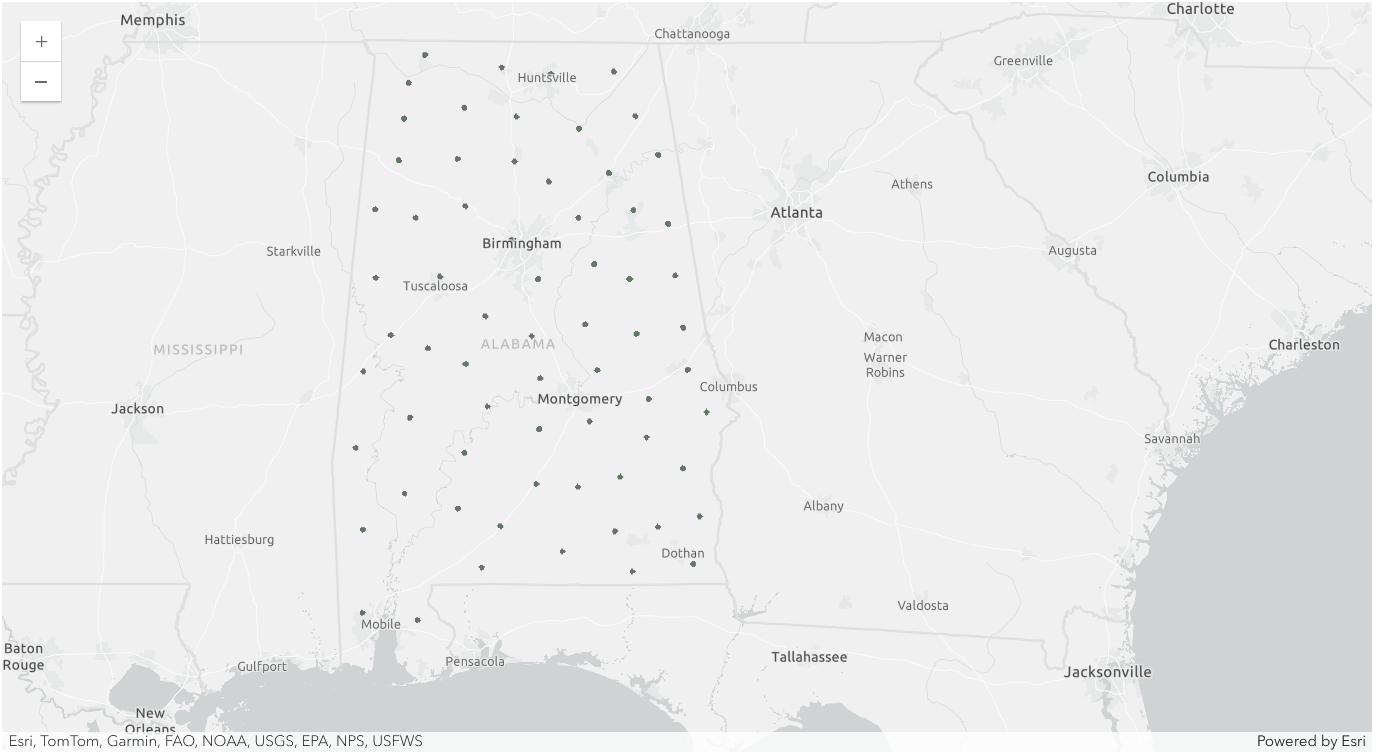

In [74]:
covid_map = gis.map('Alabama, USA')
covid_map

In [68]:
# Plot on a map
new_df.spatial.plot(covid_map)

True

In [ ]:
covid_map.basemap.basemap = 'arcgis-light-gray'

## Conclusion

In this part of the `arcgis.geoenrichment` module guide series, you saw how `data_collections` property of a `Country` object lists its available `data_collection`s and `analysis_variable`s. You explored different data collections, their analysis variables and then enriched study areas using the same. Towards the end, you experienced how spatially enabled dataframes can be enriched.

In the subsequent pages, you will learn about Generating Reports and Standard Geography Queries.